# **Crime Risk in DC - Analysis**

### Packages

In [1]:
import requests
import json
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 100)

### Read in API data (2017-2019)

In [2]:
url_crime = 'https://opendata.arcgis.com/datasets/f08294e5286141c293e9202fcd3e8b57_1.geojson'
df_crime = gpd.read_file(url_crime)

In [3]:
url_pop = 'https://opendata.arcgis.com/datasets/c143846b7bf4438c954c5bb28e5d1a21_2.geojson'
df_pop = gpd.read_file(url_pop)

### Clean API Data

In [4]:
df_crime = df_crime[['CCN', 'START_DATE', 'END_DATE', 'REPORT_DAT', 'SHIFT', 'WARD', 'BLOCK_GROUP', 'CENSUS_TRACT', 
                     'BLOCK', 'OFFENSE', 'METHOD', 'LATITUDE', 'LONGITUDE', 'OBJECTID', 'OCTO_RECORD_ID', 'geometry']]

In [5]:
df_pop = df_pop[['TRACT', 'BLKGRP', 'P0010001', 'SHAPE_Length', 'SHAPE_Area', 'geometry']]
df_pop = df_pop.rename(columns={'P0010001': 'Population'})

### View API Data

In [6]:
df_crime.head()

,CCN,START_DATE,END_DATE,REPORT_DAT,SHIFT,WARD,BLOCK_GROUP,CENSUS_TRACT,BLOCK,OFFENSE,METHOD,LATITUDE,LONGITUDE,OBJECTID,OCTO_RECORD_ID,geometry
0,18221681,2018-12-31T11:49:19,2018-12-31T14:43:21,2019-01-01T10:24:06,DAY,2,005800 1,005800,1100 - 1199 BLOCK OF F STREET NW,THEFT/OTHER,OTHERS,38.897346,-77.027563,355636251,18221681-01,POINT (-77.02757 38.89735)
1,18221708,2018-12-31T12:48:46,2018-12-31T12:51:47,2019-01-01T15:48:01,EVENING,2,005800 1,005800,700 - 799 BLOCK OF 7TH STREET NW,THEFT/OTHER,OTHERS,38.899121,-77.021926,355636258,18221708-01,POINT (-77.02193 38.89913)
2,18221735,2018-12-31T14:29:20,2018-12-31T15:07:39,2019-01-01T07:56:37,DAY,6,004802 1,004802,400 - 499 BLOCK OF M STREET NW,THEFT/OTHER,OTHERS,38.905635,-77.017559,355636263,18221735-01,POINT (-77.01756 38.90564)
3,18221785,2018-12-31T12:30:11,2018-12-31T17:14:09,2019-01-01T02:32:59,MIDNIGHT,1,002802 1,002802,1400 - 1499 BLOCK OF HARVARD COURT NW,THEFT F/AUTO,OTHERS,38.926937,-77.033694,355636277,18221785-01,POINT (-77.03370 38.92694)
4,18220657,2018-12-29T14:15:38,2018-12-29T14:50:43,2019-01-05T11:31:29,DAY,6,010200 2,010200,900 - 1199 BLOCK OF 4TH STREET SW,THEFT F/AUTO,OTHERS,38.877862,-77.017644,355636322,18220657-01,POINT (-77.01765 38.87787)


### Visualizations

In [ ]:
# Number of crimes by year

# year_df = pd.DataFrame(df.YEAR.value_counts())
# year_df = year_df.rename(columns={"YEAR": "Year"})
# year_df

#### Categorical plot for count of offense type

Text(-150.559375, 0.5, 'Offense Type')

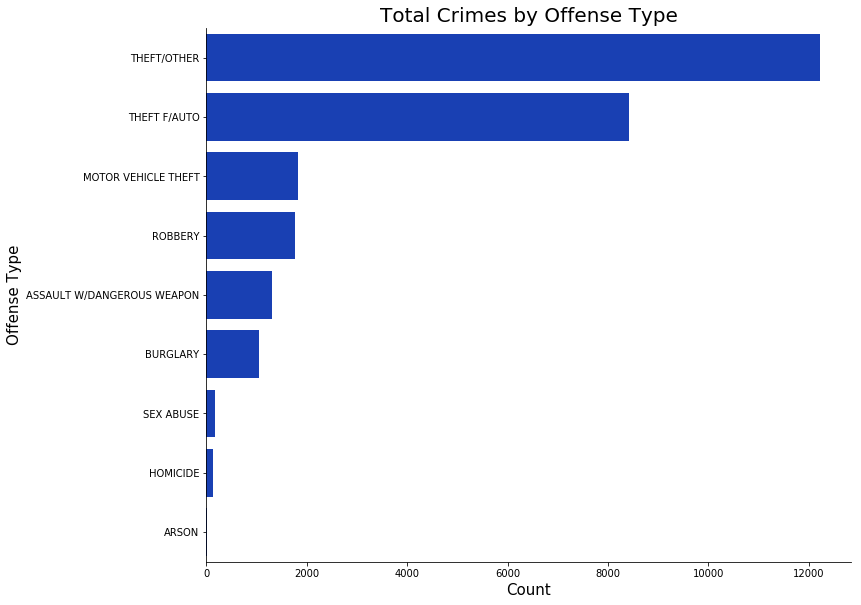

In [10]:
color = ['#0033cc']
sns.catplot(y='OFFENSE', kind='count', height=8, aspect=1.5, order=df_crime.OFFENSE.value_counts().index, 
            data=df_crime, palette=sns.color_palette(color))

plt.title('Total Crimes by Offense Type', fontsize=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Offense Type', fontsize=15)

#### Type of weapon used in attack

In [30]:
method_df = pd.DataFrame(df_crime.METHOD.value_counts())
method_df = method_df.rename(columns={'METHOD': 'Weapon Used'})
#method_df = method_df.reset_index()
s = pd.Series([1, 2, 3])
method_df.set_index(s)

#method_pie = method_df.plot.pie(y='Weapon Used', figsize=(7, 7))
# # Create a pie chart
# plt.pie(
#     # using data total)arrests
#     method_df['Weapon Used'],
#     # with the labels being officer names
#     labels=method_df['index'],
#     # with no shadows
#     shadow=False,
#     # with one slide exploded out
#     explode=(0.15, 0, 0),
#     # with the start angle at 90%
#     startangle=90,
#     )

# # View the plot drop above
# plt.axis('equal')

# # View the plot
# plt.tight_layout()
# plt.show()
method_df

,Weapon Used
OTHERS,25085
GUN,1280
KNIFE,541


### Categorical plot for count of total crimes by neighborhood and time of day

In [ ]:
sns.catplot(x='BID', hue='SHIFT', kind='count', height=8, aspect=1.5, order=df.BID.value_counts().index, 
            data=df, legend=False)

plt.title('Total Crimes by Neighborhood and Time of Day', fontsize=20)

plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.xlabel('Neighborhood', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Time of Day', loc='right')

#### Number of Crimes by Ward

In [ ]:
ward_df = pd.DataFrame(df.WARD.value_counts())
ward_df = ward_df.rename(columns={"WARD": "Ward"})
ward_df

#### Categorical plot for count of total crimes by ward and time of day

In [ ]:
sns.catplot(x='WARD', hue='SHIFT', kind='count', height=8, aspect=1.5, order=df.WARD.value_counts().index, 
            data=df, legend=False)

plt.title('Total Crimes by Ward and Time of Day', fontsize=20)

plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Ward', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(title='Time of Day', loc='right')

#### Tableau map of crimes by ward

In [ ]:
%%HTML 

<div class='tableauPlaceholder' id='viz1570313986891' style='position: relative'>
    <noscript>
        <a href='#'>
            <img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;dc&#47;dc_crimes_map&#47;DCCrimesbyWard2017-2019&#47;1_rss.png' style='border: none' />
        </a>
    </noscript>
    <object class='tableauViz'  style='display:none;'>
        <param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
        <param name='embed_code_version' value='3' /> 
        <param name='site_root' value='' />
        <param name='name' value='dc_crimes_map&#47;DCCrimesbyWard2017-2019' />
        <param name='tabs' value='no' />
        <param name='toolbar' value='yes' />
        <param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;dc&#47;dc_crimes_map&#47;DCCrimesbyWard2017-2019&#47;1.png' /> 
        <param name='animate_transition' value='yes' />
        <param name='display_static_image' value='yes' />
        <param name='display_spinner' value='yes' />
        <param name='display_overlay' value='yes' />
        <param name='display_count' value='yes' />
        <param name='filter' value='publish=yes' />
    </object>              
    <script type='text/javascript'>                    
        var divElement = document.getElementById('viz1570313986891');                    
        var vizElement = divElement.getElementsByTagName('object')[0];                    
        vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    
        var scriptElement = document.createElement('script');                    
        scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
        vizElement.parentNode.insertBefore(scriptElement, vizElement);                
    </script>
</div>